# Размечаем коментарии

In [1]:
%pip install pandas numpy matplotlib seaborn wordcloud scikit-learn jupyter

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached nbform

In [2]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("разметка комментариев 2.csv", on_bad_lines='skip')

# Если колонки не названы правильно — переименуем их
df.columns = ['id', 'rating', 'comment',
              'Скорость', 'Качество выполнения',
              'Сотрудники', 'Выполнение', 'Вопрос решён']

# Функция для проверки наличия ключевых слов
def contains_keywords(text, keywords):
    if pd.isna(text):
        return 0
    text = text.lower()
    return 1 if any(kw in text for kw in keywords) else 0

# Ключевые слова по категориям
keywords = {
    'Скорость': ['быстро', 'оперативно', 'сразу', 'за минуту', 'моментально', 'вовремя'],
    'Качество выполнения': ['аккуратно', 'качественно', 'хорошо сделали', 'профессионально', 'чётко'],
    'Сотрудники': ['мастер', 'специалист', 'сотрудник', 'вежливый', 'грамотный', 'приятный', 'профессионал'],
    'Выполнение': ['выполнили', 'всё сделали', 'работа выполнена', 'справились', 'решили'],
    'Вопрос решён': ['вопрос решен', 'вопрос закрыт', 'исправили', 'всё работает', 'всё ок']
}

# Разметка
for category, words in keywords.items():
    df[category] = df['comment'].apply(lambda x: contains_keywords(x, words))

# Сохранение результата
df.to_csv("размеченные_комментарии.csv", index=False)

print("Разметка завершена! Результат сохранён в файл 'размеченные_комментарии.csv'")

Разметка завершена! Результат сохранён в файл 'размеченные_комментарии.csv'


Облако слов

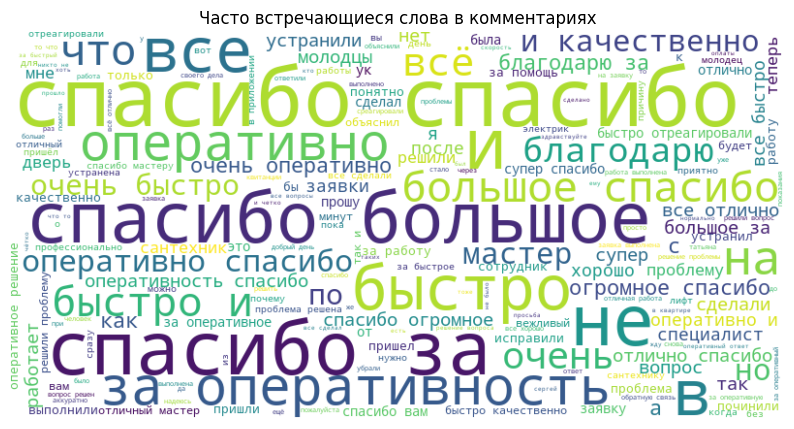

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Объединяем все комментарии в один текст
all_comments = ' '.join(df['comment'].dropna().str.lower())

# Создаем облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Часто встречающиеся слова в комментариях")
plt.show()

Топ N самых часто встречающихся слов

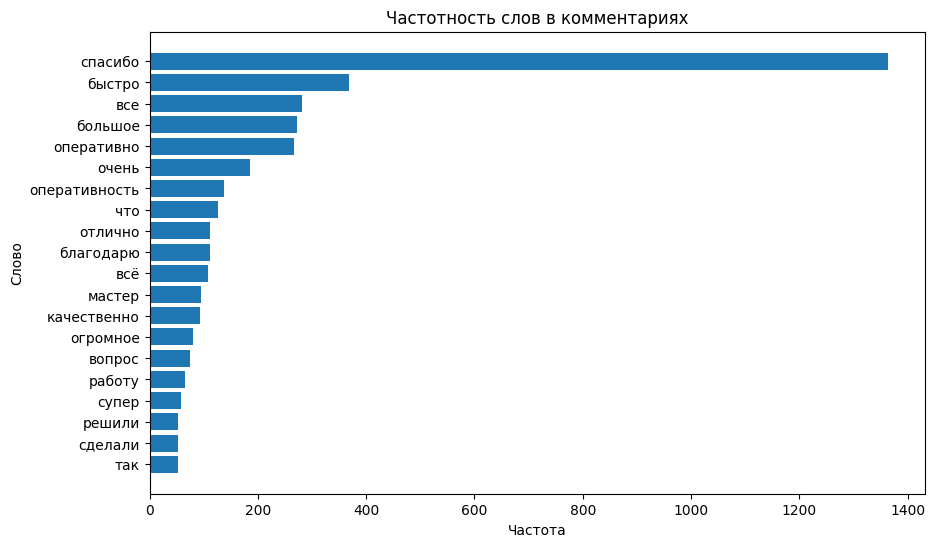

In [5]:
from collections import Counter
import re

def extract_words(text):
    return re.findall(r'\b\w{3,}\b', text.lower())

words = []
for comment in df['comment'].dropna():
    words.extend(extract_words(comment))

common_words = Counter(words).most_common(20)

# Визуализация
words_df = pd.DataFrame(common_words, columns=['Слово', 'Частота'])

plt.figure(figsize=(10,6))
plt.barh(words_df['Слово'], words_df['Частота'])
plt.title("Частотность слов в комментариях")
plt.xlabel("Частота")
plt.ylabel("Слово")
plt.gca().invert_yaxis()
plt.show()

Распредиление оценок

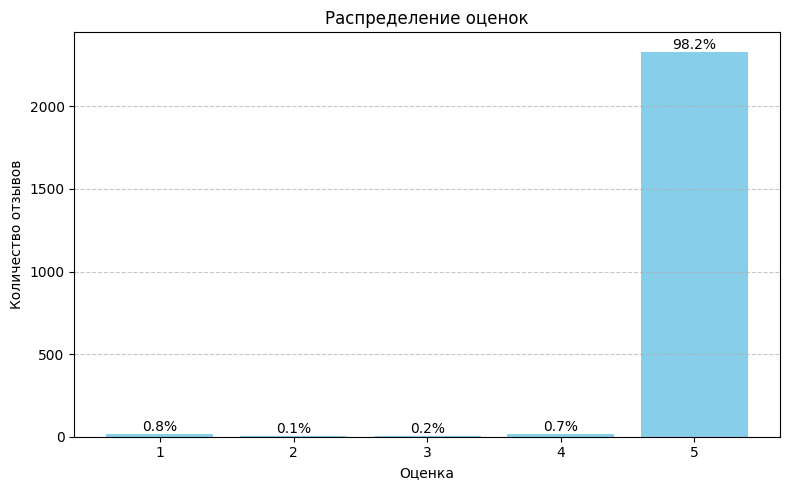

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("размеченные_комментарии.csv", on_bad_lines='skip')

# Считаем количество по оценкам
rating_counts = df['rating'].value_counts().sort_index()

# Считаем проценты
total = len(df)
percentages = (rating_counts / total) * 100

# Визуализация
plt.figure(figsize=(8, 5))
bars = plt.bar(rating_counts.index.astype(str), rating_counts.values, color='skyblue')

# Подписываем столбики процентами
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

# Оформление графика
plt.title("Распределение оценок")
plt.xlabel("Оценка")
plt.ylabel("Количество отзывов")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()